In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("./Dataset1/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Exploratory Data Analysis(EDA)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

<Axes: >

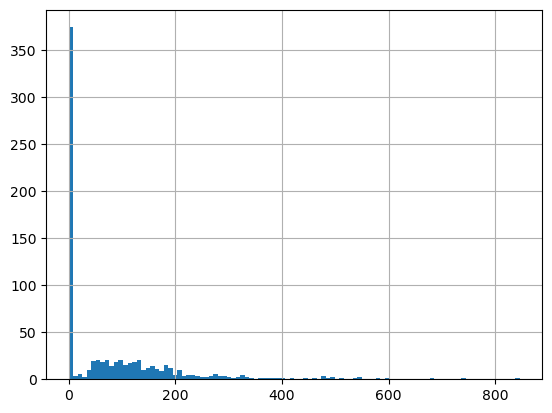

In [9]:
df["Insulin"].hist(bins=100)

In [9]:
basic_info = df.describe().T
basic_info

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualization

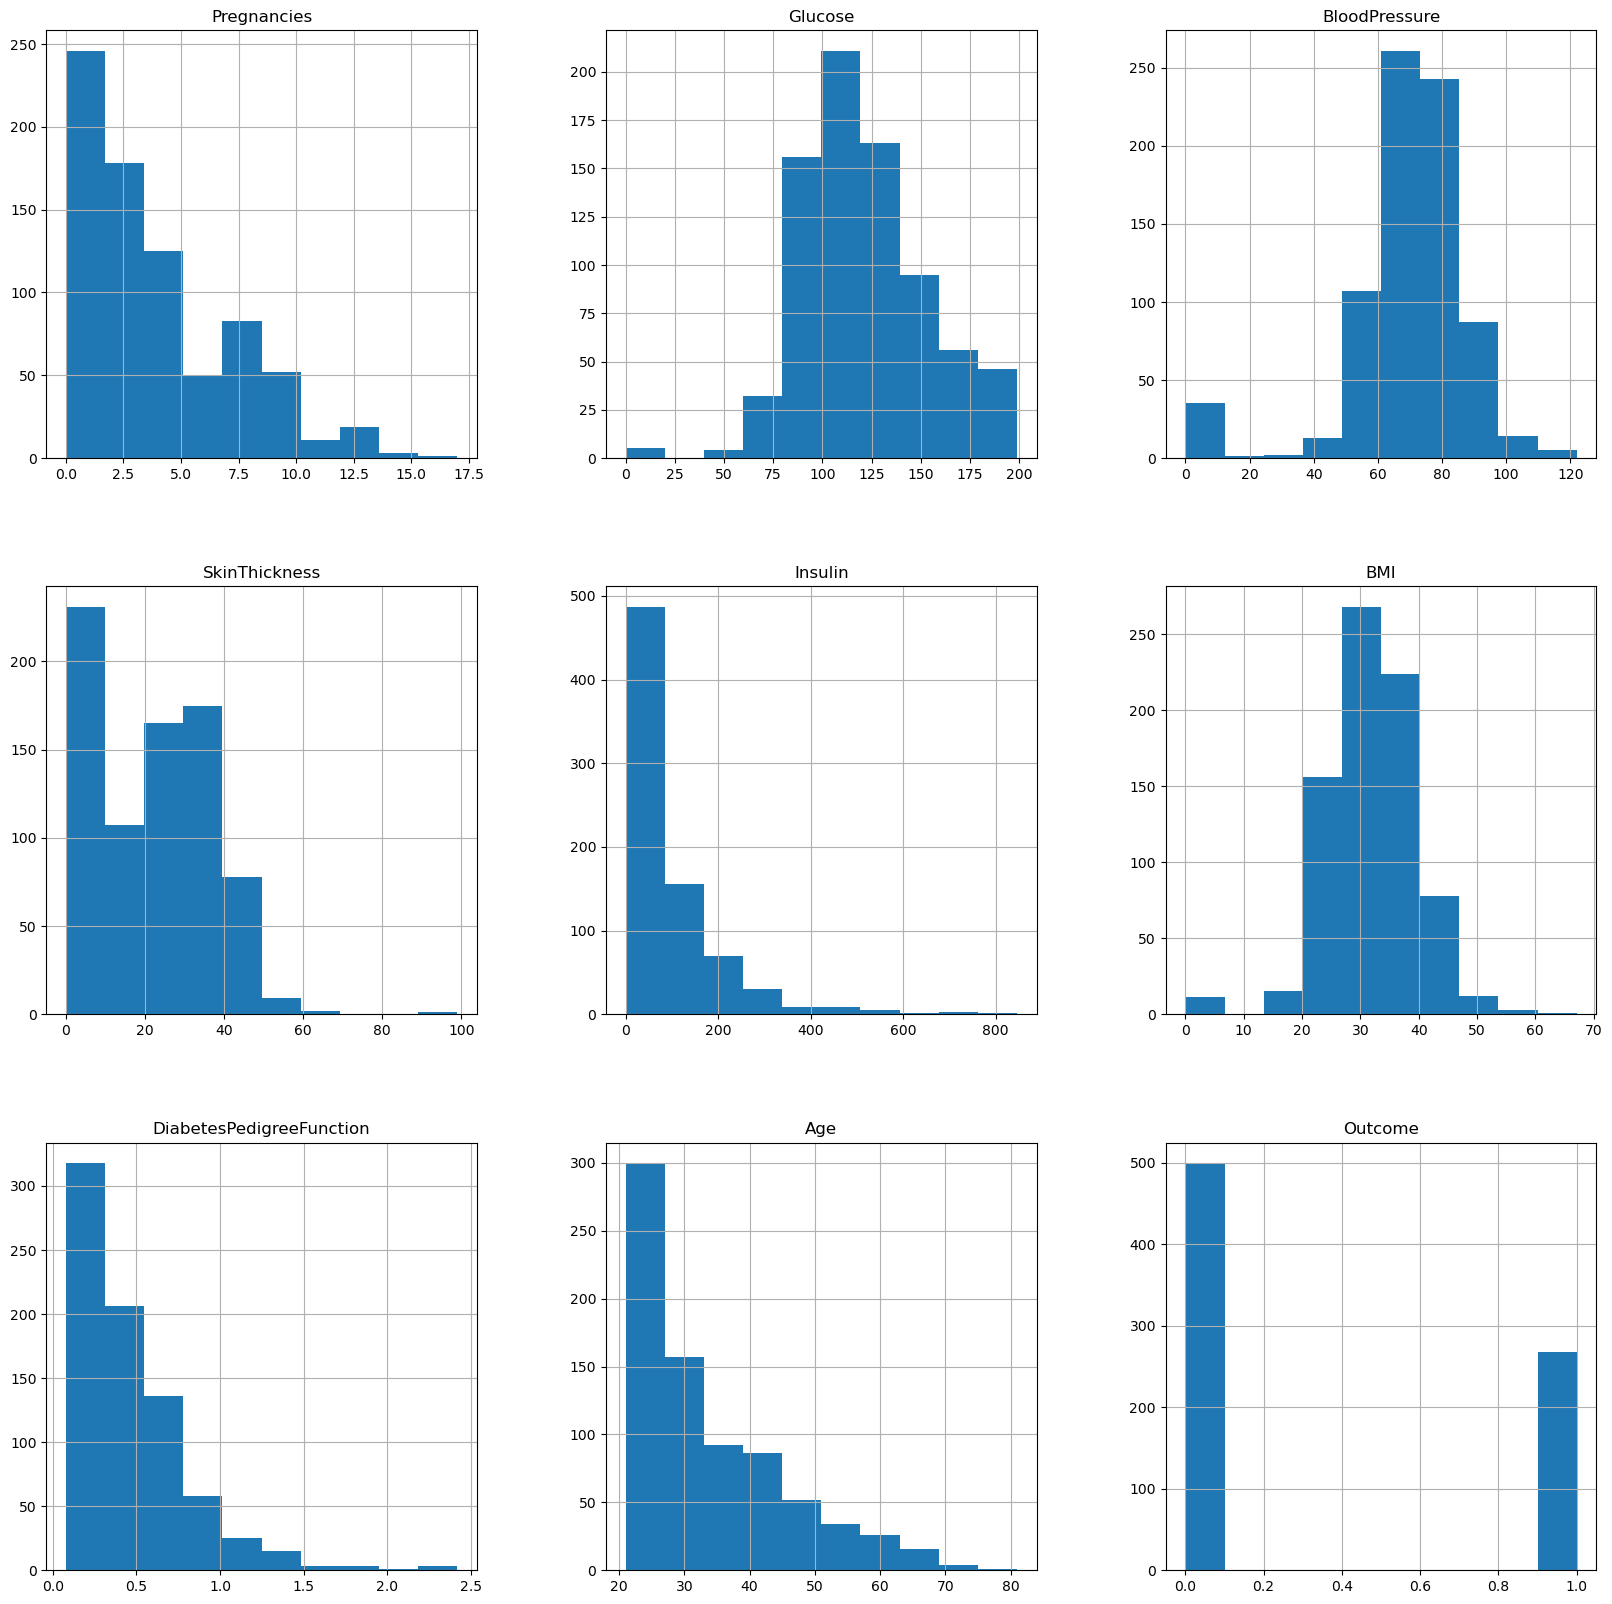

In [17]:
p = df.hist(figsize = (20,20))

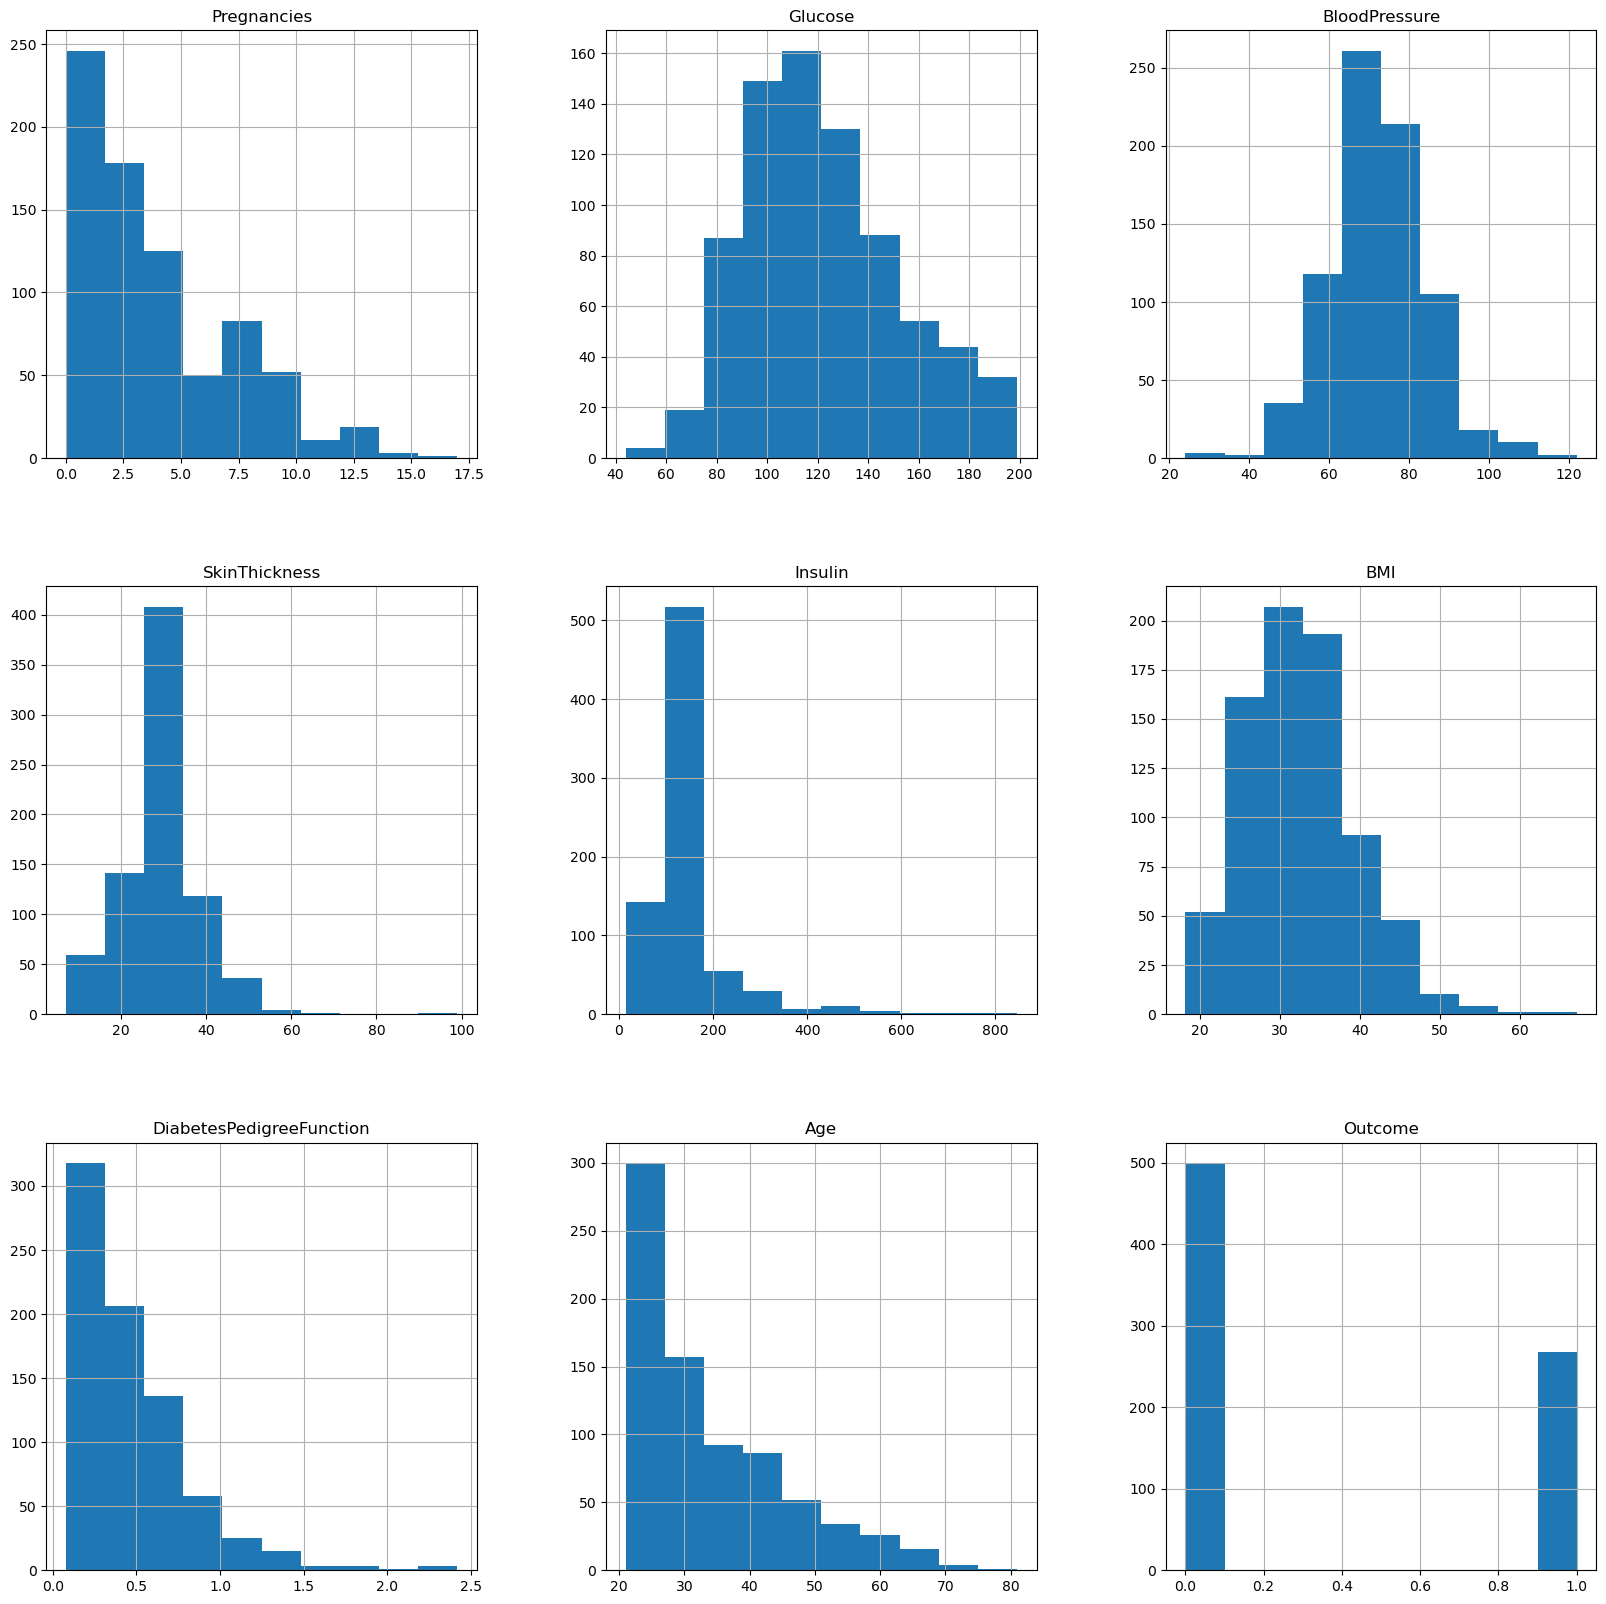

In [23]:
p = df_copy.hist(figsize = (20,20))

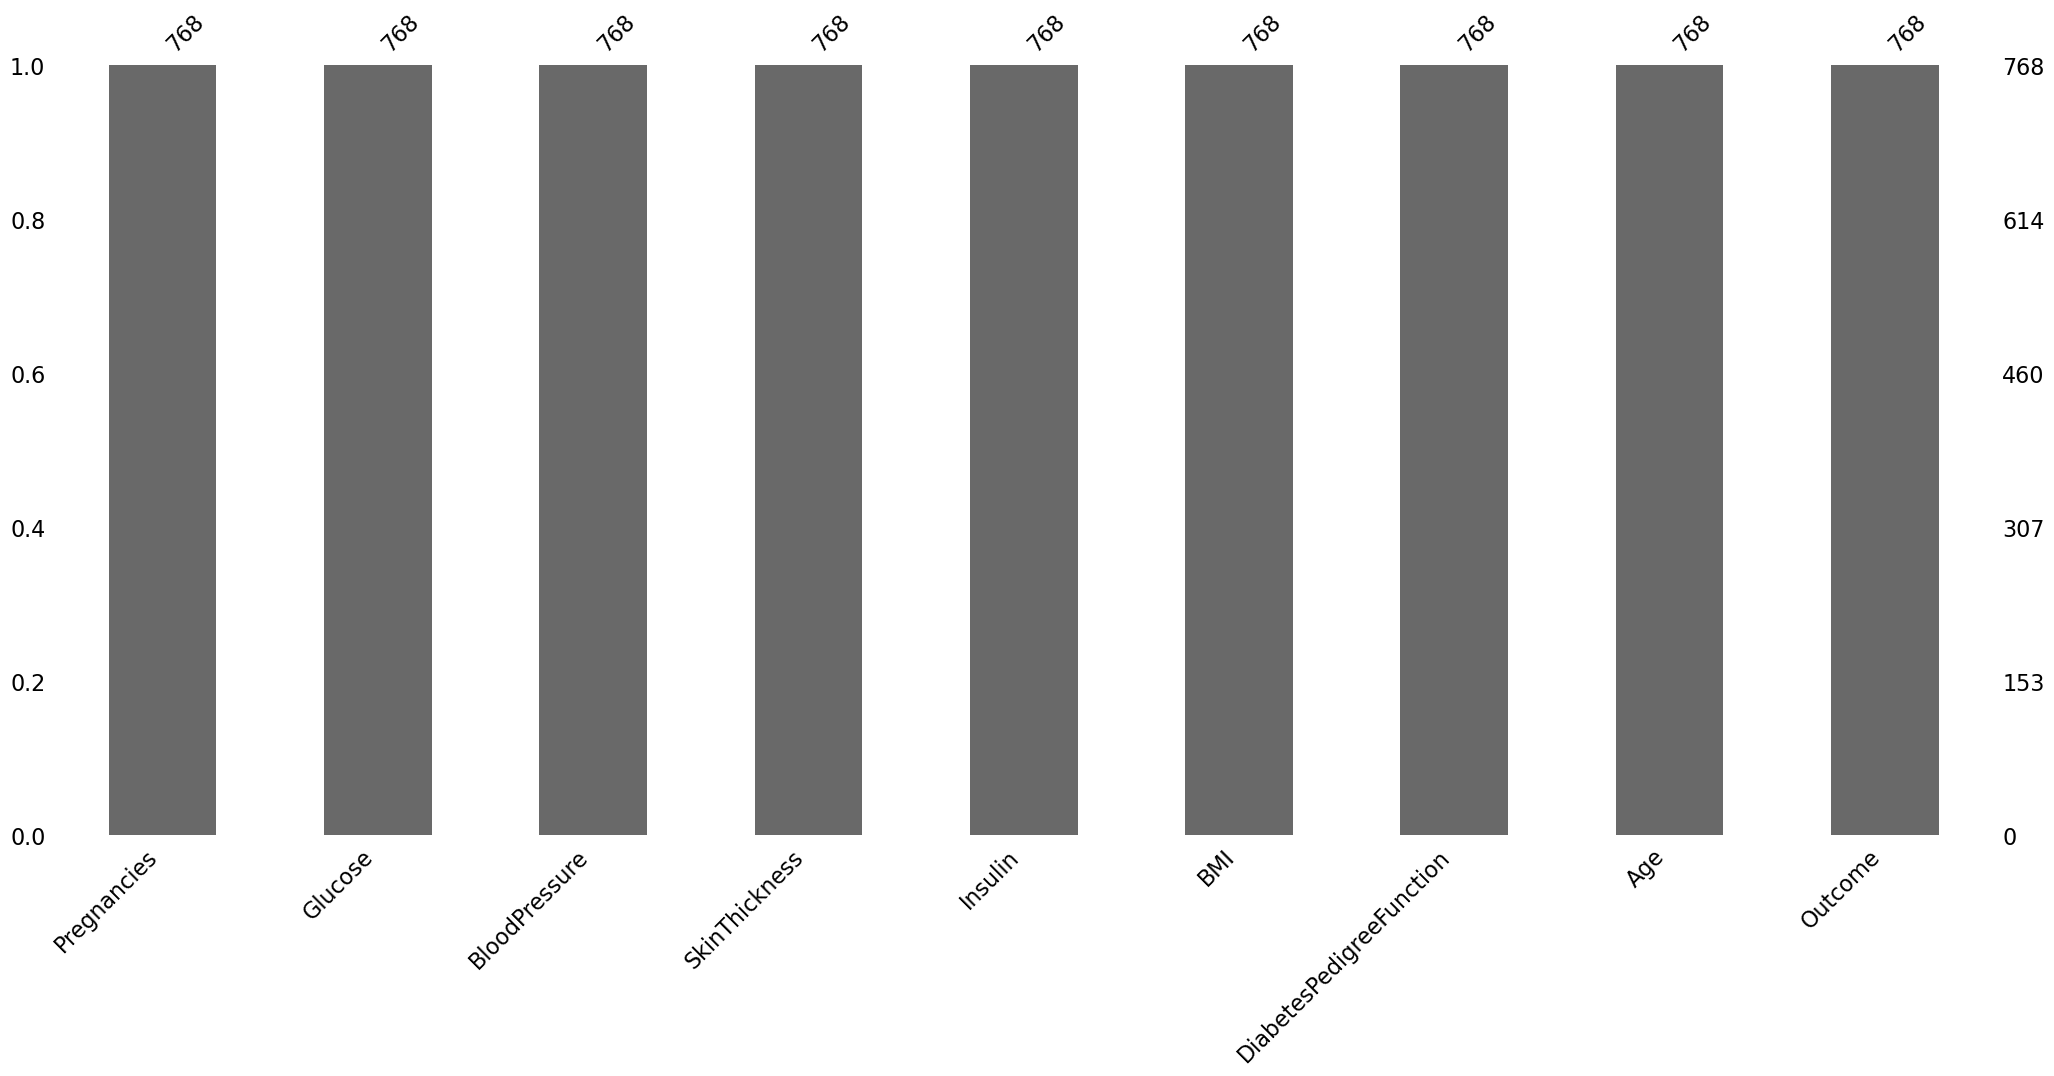

In [50]:
p=msno.bar(df)

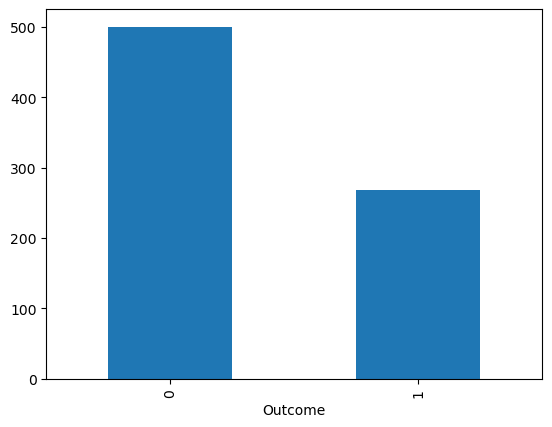

In [25]:
p=df['Outcome'].value_counts().plot(kind="bar")

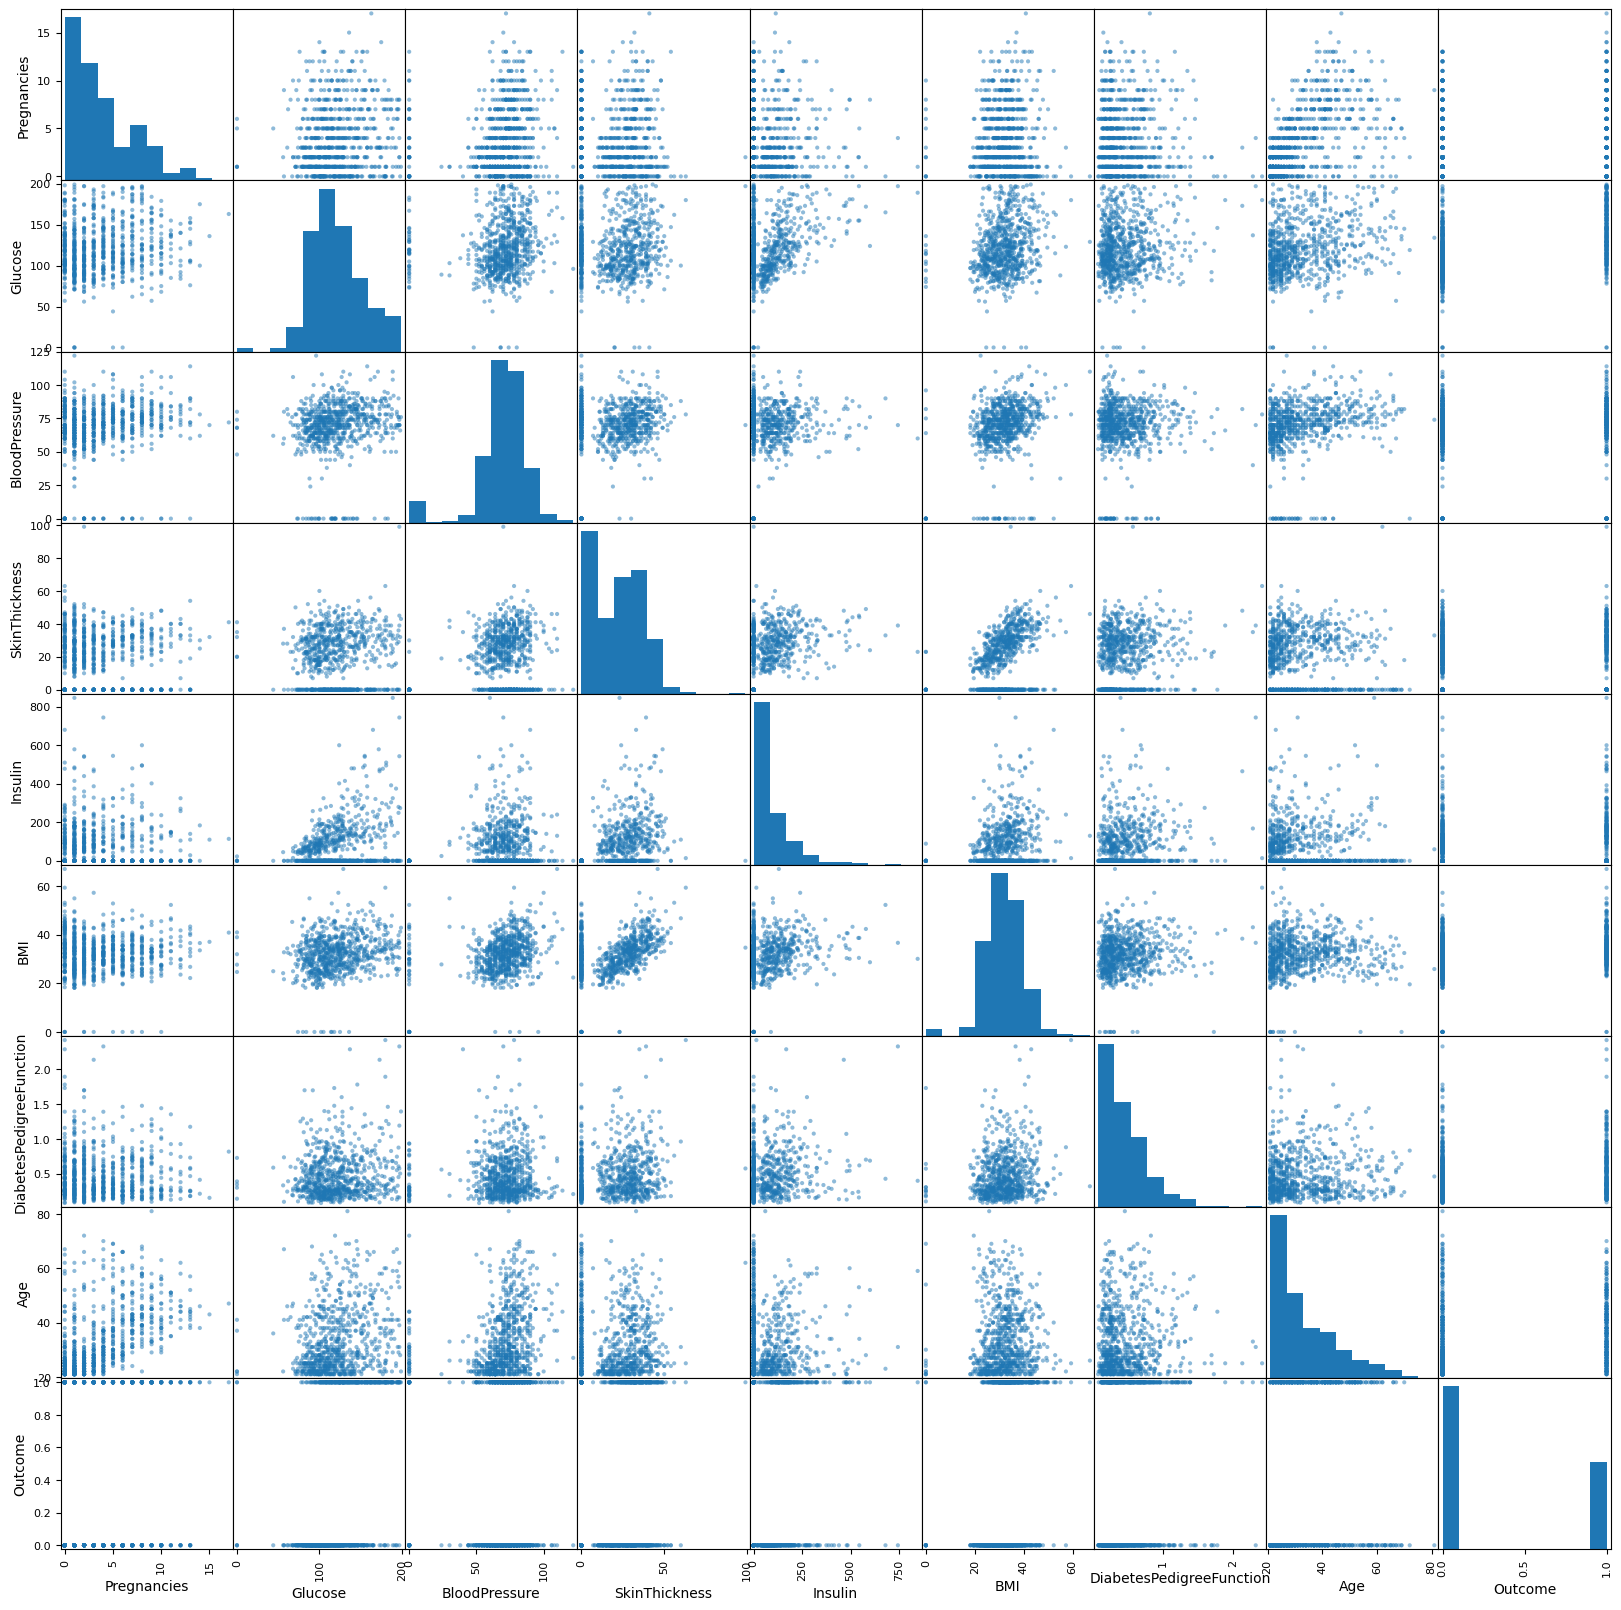

In [52]:
p = scatter_matrix(df,figsize=(20,20))

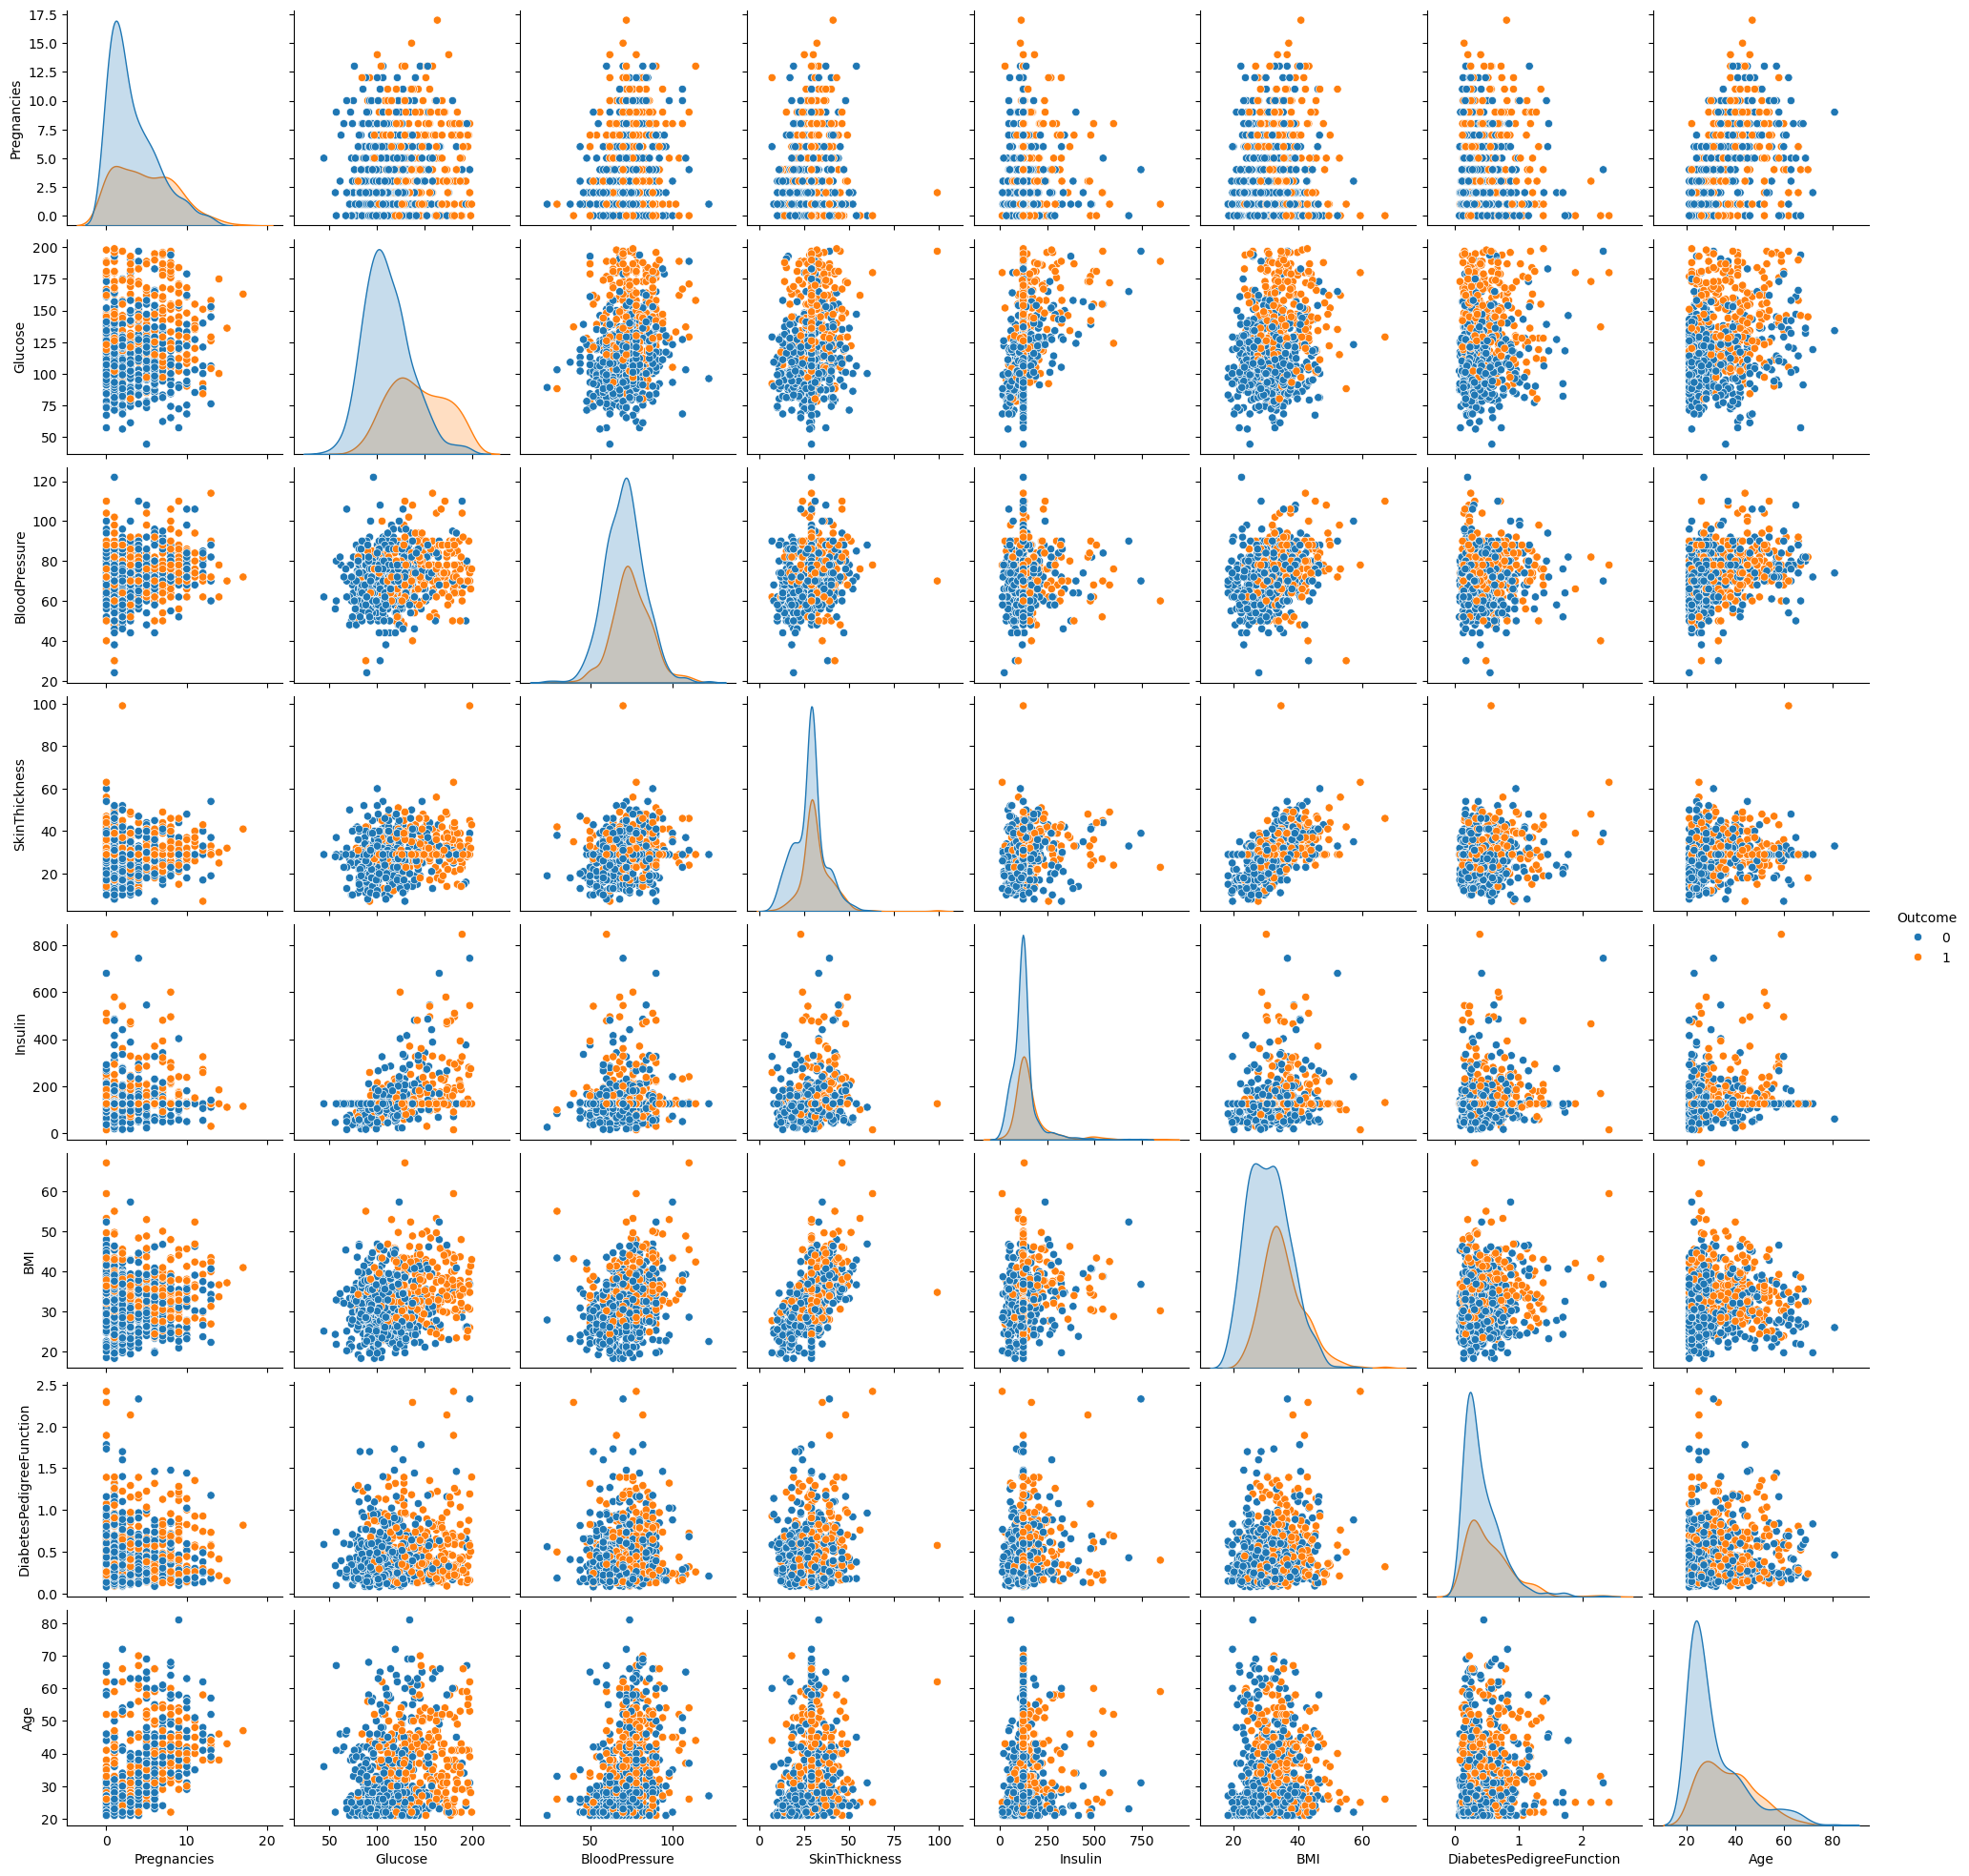

In [53]:
p = sns.pairplot(df_copy,hue='Outcome')

Correlation between all the features

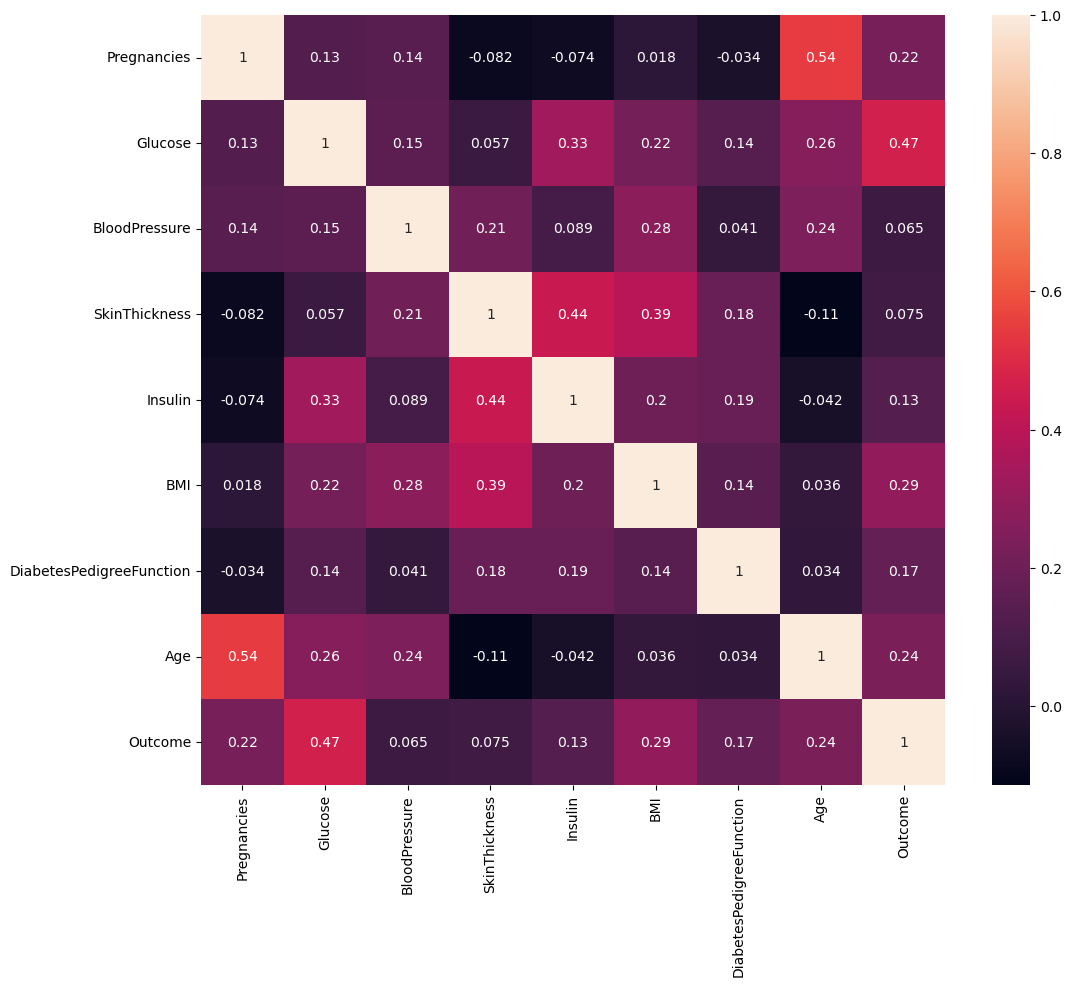

In [55]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(),annot=True)

In [5]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_drop_all = df.copy()
for col in cols_with_zero_invalid:
    df_drop_all = df_drop_all[df_drop_all[col] != 0]

In [7]:
df_impute_all = df.copy()
df_impute_all[cols_with_zero_invalid] = df_impute_all[cols_with_zero_invalid].replace(0, np.nan)
df_impute_all['Glucose'] = df_impute_all['Glucose'].fillna(df_impute_all['Glucose'].mean())
df_impute_all['BloodPressure'] = df_impute_all['BloodPressure'].fillna(df_impute_all['BloodPressure'].median())
df_impute_all['SkinThickness'] = df_impute_all['SkinThickness'].fillna(df_impute_all['SkinThickness'].median())
df_impute_all['Insulin'] = df_impute_all['Insulin'].fillna(df_impute_all['Insulin'].median())
df_impute_all['BMI'] = df_impute_all['BMI'].fillna(df_impute_all['BMI'].mean())

In [9]:
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

def active_learning_pipeline(df_input, label_col="Outcome", threshold=0.1):
    X = df_input.drop(label_col, axis=1)
    y = df_input[label_col]

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    INIT_LABELED = 50
    BATCH_SIZE = 20
    ITERATIONS = 10

    X_labeled = X_train_full.iloc[:INIT_LABELED]
    y_labeled = y_train_full.iloc[:INIT_LABELED]
    X_unlabeled = X_train_full.iloc[INIT_LABELED:]
    y_unlabeled = y_train_full.iloc[INIT_LABELED:]

    f1_scores = []
    labeled_sizes = []
    hard_example_indices = []
    hard_counter = []

    ngb = NGBClassifier(Dist=Bernoulli, verbose=False)

    for i in range(ITERATIONS):
        ngb.fit(X_labeled, y_labeled)

        proba = ngb.predict_proba(X_unlabeled)
        uncertainty = np.abs(proba[:, 1] - 0.5)

        hard_idxs = X_unlabeled[uncertainty < threshold].index.tolist()
        hard_example_indices.extend(hard_idxs)
        hard_counter.append(len(hard_idxs))

        query_idx = np.argsort(uncertainty)[:BATCH_SIZE]

        X_new = X_unlabeled.iloc[query_idx]
        y_new = y_unlabeled.iloc[query_idx]

        X_labeled = pd.concat([X_labeled, X_new])
        y_labeled = pd.concat([y_labeled, y_new])

        indices_to_drop = X_unlabeled.iloc[query_idx].index
        X_unlabeled = X_unlabeled.drop(index=indices_to_drop)
        y_unlabeled = y_unlabeled.drop(index=indices_to_drop)

        preds = ngb.predict(X_test)
        f1 = f1_score(y_test, preds)

        f1_scores.append(f1)
        labeled_sizes.append(len(X_labeled))

        print(f"Iter {i+1} - F1 Score: {f1:.4f} - Labeled Size: {len(X_labeled)}")

    # Тешки примери (по итерации)
    hard_examples_X = X_train_full.loc[hard_example_indices]
    hard_examples_y = y_train_full.loc[hard_example_indices]

    # 📌 1. Модел: само labeled податоци
    model_labeled = NGBClassifier(Dist=Bernoulli, verbose=False)
    model_labeled.fit(X_labeled, y_labeled)
    f1_labeled = f1_score(y_test, model_labeled.predict(X_test))

    # 📌 2. Модел: labeled + hard examples
    X_combined = pd.concat([X_labeled, hard_examples_X])
    y_combined = pd.concat([y_labeled, hard_examples_y])
    model_combined = NGBClassifier(Dist=Bernoulli, verbose=False)
    model_combined.fit(X_combined, y_combined)
    f1_combined = f1_score(y_test, model_combined.predict(X_test))

    # 📌 3. Модел: само hard examples
    model_hard = NGBClassifier(Dist=Bernoulli, verbose=False)
    model_hard.fit(hard_examples_X, hard_examples_y)
    f1_hard = f1_score(y_test, model_hard.predict(X_test))

    print("\n📊 Final Evaluation:")
    print(f"F1 Score (Only Labeled):       {f1_labeled:.4f}")
    print(f"F1 Score (+Hard Examples):     {f1_combined:.4f}")
    print(f"F1 Score (Only Hard Examples): {f1_hard:.4f}")

    return (labeled_sizes, f1_scores, hard_counter,
            f1_labeled, f1_combined, f1_hard,
            hard_examples_X, hard_examples_y)

In [15]:
# Run за DROP ALL
sizes_drop, f1s_drop, hard_counter_drop, f1_labeled_drop, f1_combined_drop, f1_hard_drop, hard_X_drop, hard_y_drop = active_learning_pipeline(df_drop_all)

# Run за IMPUTE ALL
sizes_imp, f1s_imp, hard_counter_imp, f1_labeled_imp, f1_combined_imp, f1_hard_imp, hard_X_imp, hard_y_imp = active_learning_pipeline(df_impute_all)

# Печати број на тешки примери по итерација (споредбено)
print("Hard examples per iteration (DROP ALL):")
for i, count in enumerate(hard_counter_drop):
    print(f"Iter {i+1}: {count}")

print("\nHard examples per iteration (IMPUTE ALL):")
for i, count in enumerate(hard_counter_imp):
    print(f"Iter {i+1}: {count}")


Iter 1 - F1 Score: 0.6154 - Labeled Size: 70
Iter 2 - F1 Score: 0.5926 - Labeled Size: 90
Iter 3 - F1 Score: 0.6129 - Labeled Size: 110
Iter 4 - F1 Score: 0.5965 - Labeled Size: 130
Iter 5 - F1 Score: 0.6000 - Labeled Size: 150
Iter 6 - F1 Score: 0.5283 - Labeled Size: 170
Iter 7 - F1 Score: 0.7200 - Labeled Size: 190
Iter 8 - F1 Score: 0.6531 - Labeled Size: 210
Iter 9 - F1 Score: 0.6939 - Labeled Size: 230
Iter 10 - F1 Score: 0.7308 - Labeled Size: 250

📊 Final Evaluation:
F1 Score (Only Labeled):       0.6809
F1 Score (+Hard Examples):     0.6667
F1 Score (Only Hard Examples): 0.3415
Iter 1 - F1 Score: 0.5517 - Labeled Size: 70
Iter 2 - F1 Score: 0.5370 - Labeled Size: 90
Iter 3 - F1 Score: 0.5333 - Labeled Size: 110
Iter 4 - F1 Score: 0.5149 - Labeled Size: 130
Iter 5 - F1 Score: 0.6000 - Labeled Size: 150
Iter 6 - F1 Score: 0.6111 - Labeled Size: 170
Iter 7 - F1 Score: 0.5926 - Labeled Size: 190
Iter 8 - F1 Score: 0.6038 - Labeled Size: 210
Iter 9 - F1 Score: 0.6078 - Labeled Size

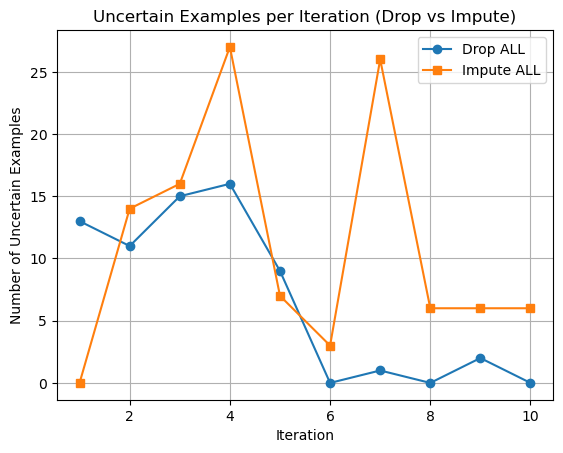

In [17]:
plt.plot(range(1, len(hard_counter_drop)+1), hard_counter_drop, label="Drop ALL", marker='o')
plt.plot(range(1, len(hard_counter_imp)+1), hard_counter_imp, label="Impute ALL", marker='s')
plt.title("Uncertain Examples per Iteration (Drop vs Impute)")
plt.xlabel("Iteration")
plt.ylabel("Number of Uncertain Examples")
plt.legend()
plt.grid(True)
plt.show()